In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('diabetes.csv')


In [ ]:
 df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print('No of zero values in glucose', df[df['Glucose']==0].shape[0])
print('No of zero values in blood pressure', df[df['BloodPressure']==0].shape[0])
print('No of zero values in skin thickness', df[df['SkinThickness']==0].shape[0])
print('No of zero values in insulin', df[df['Insulin']==0].shape[0])
print('No of zero values in BMI', df[df['BMI']==0].shape[0])

No of zero values in glucose 5
No of zero values in blood pressure 35
No of zero values in skin thickness 227
No of zero values in insulin 374
No of zero values in BMI 11


In [ ]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Negative (0): 500
Positive (1): 268


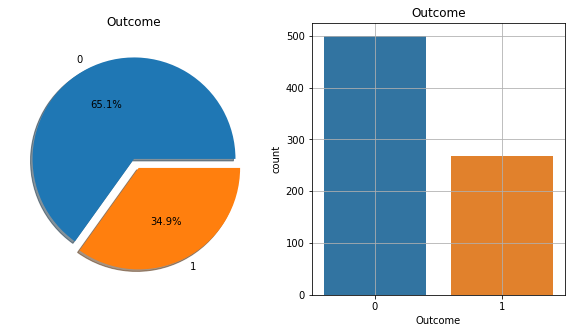

In [ ]:
# Count plot
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
N,P = df ['Outcome'].value_counts()
print('Negative (0):',N)
print('Positive (1):',P)
plt.grid()
plt.show()


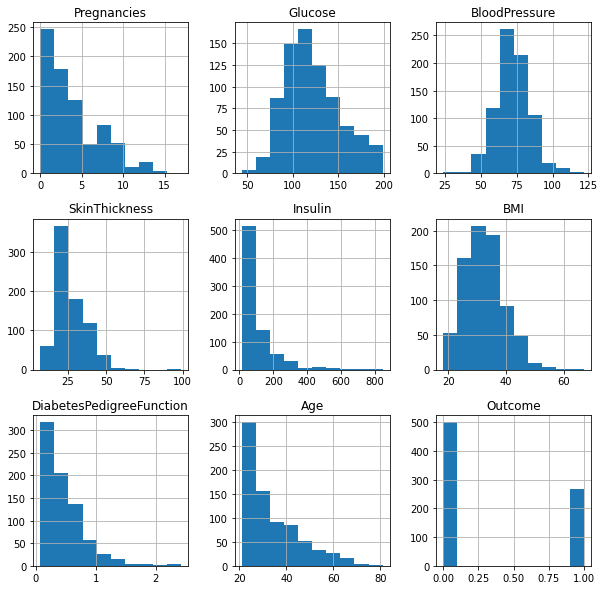

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

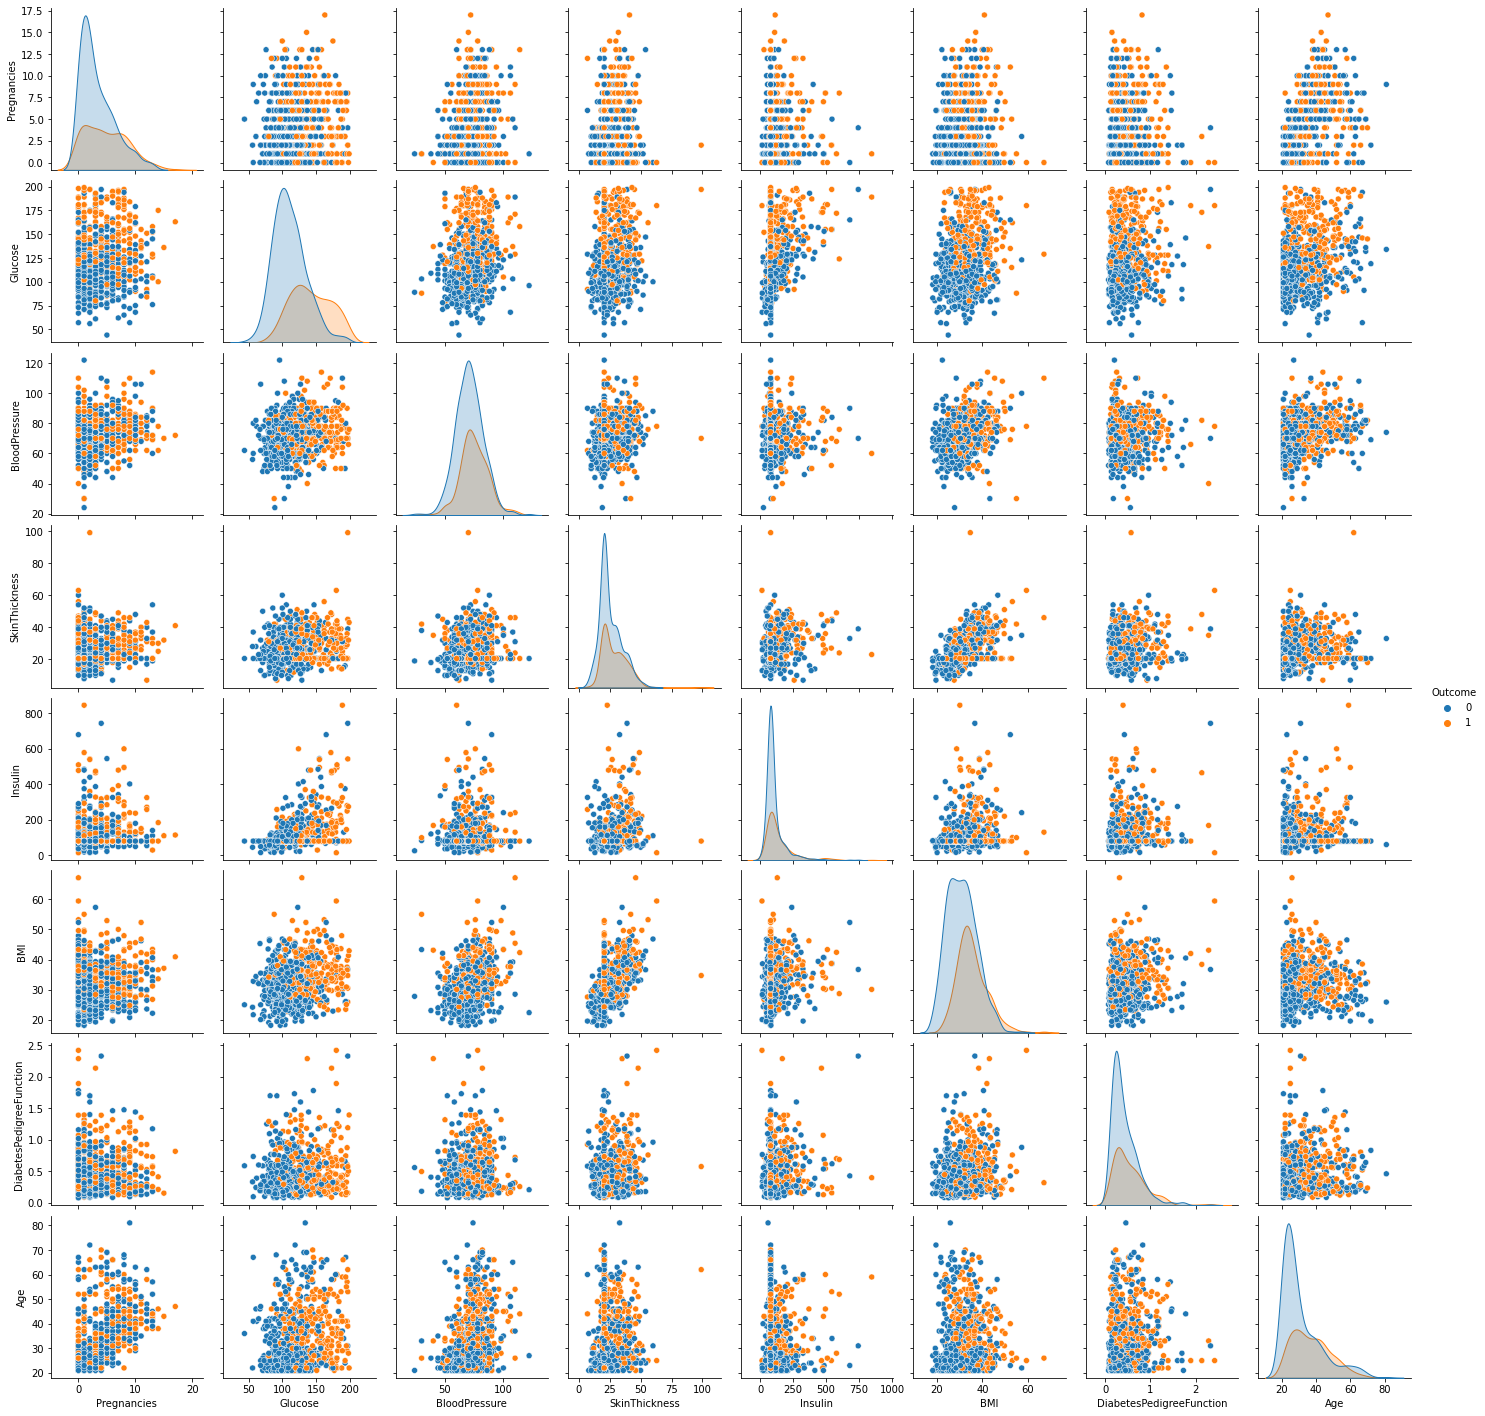

In [ ]:
sns.pairplot(data=df, hue='Outcome')
plt.show()

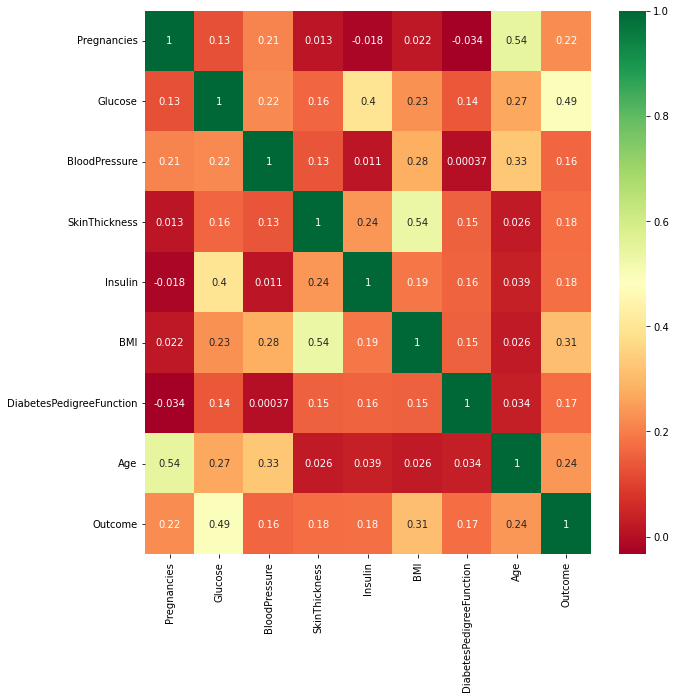

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True, cmap='RdYlGn')

In [ ]:
y = df['Outcome']    #seperate object for target feature
X = df.drop('Outcome', axis=1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# Applying standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

In [ ]:
train=pd.read_csv('traine.csv')
test=pd.read_csv('test.csv')


In [ ]:
y1 = train['Outcome']    #seperate object for target feature
X1 = train.drop('Outcome', axis=1)
y2 = test['Outcome']    #seperate object for target feature
X2 = test.drop('Outcome', axis=1)

In [ ]:
pip install python-dict-wrapper

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from python_dict_wrapper import make_wrapper
from python_dict_wrapper import ListWrapper
lr_list = ['Logistic Regression'] # list of outputs 0-name, 1-lr_predict,2-AUC, 3-Accuracy score

lr_fit = LogisticRegression(solver='liblinear', multi_class='ovr')
lr_fit.fit(X1, y1)
#print(lr_list[0])

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
#making predicitions
lr_pred=lr_fit.predict(X2)
lr_list.insert(1, lr_pred) # add to the same lr_list

In [ ]:
y_predict = lr_fit.predict(X2)
print("Y predict/hat ", y_predict)

Y predict/hat  [1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0]


In [ ]:
# model evaluation
# Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn import metrics
print ("Train Accuracy of Logistic Regression", lr_fit.score(X1, y1)*100)
print ("Test Accuracy of Logistic Regression", lr_fit.score(X2, y2)*100)
print ("Accuracy (Test) of Logistic Regression", accuracy_score(y2, lr_pred)*100)


Train Accuracy of Logistic Regression 75.11627906976744
Test Accuracy of Logistic Regression 73.96449704142012
Accuracy (Test) of Logistic Regression 73.96449704142012


In [ ]:
lr_pred=lr_fit.predict(X2)
LogReg = round(lr_fit.score(X2, y2), 2)
mse = round(metrics.mean_squared_error(y2, lr_pred), 4)
print(mse)

0.2604


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report of Logistic Regression: \n',classification_report(y2,lr_pred,digits=4))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.9498    0.7298    0.8254       285
           1     0.3529    0.7925    0.4884        53

    accuracy                         0.7396       338
   macro avg     0.6514    0.7611    0.6569       338
weighted avg     0.8562    0.7396    0.7725       338



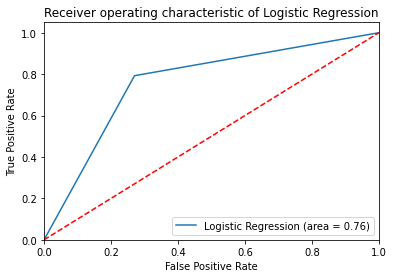

ROC AUC SCORE of Logistic Regression is 0.7611386957960941
0.7611386957960941


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y2, lr_pred)
lr_list.insert(2,auc)
fpr, tpr, thresholds = roc_curve(y2, lr_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("ROC AUC SCORE of Logistic Regression is", auc)
print(lr_list[2])

K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_list = ['K-Nearest neighbour'] # list of outputs 0-name, 1-lr_predict,2-AUC, 3-Accuracy score
knn_fit = KNeighborsClassifier()
knn_fit.fit(X1, y1)

KNeighborsClassifier()

In [ ]:
knn_pred=knn_fit.predict(X2)
knn_list.insert(1, knn_pred) # add to the same knn_list

In [ ]:
print ("Train Accuracy of KNN", knn_fit.score(X1, y1)*100)
print (" Accuracy score of  KNN", accuracy_score(y2, knn_pred)*100)

Train Accuracy of KNN 76.27906976744187
 Accuracy score of  KNN 69.23076923076923


In [ ]:
knn_pred=knn_fit.predict(X2)
KNN = round(knn_fit.score(X2, y2), 2)
mse = round(metrics.mean_squared_error(y2, knn_pred), 4)
print(mse)

0.3077


In [ ]:
print('Classification Report of K-Nearest neighbor: \n',classification_report(y2,knn_pred,digits=4))

Classification Report of K-Nearest neighbor: 
               precision    recall  f1-score   support

           0     0.9095    0.7053    0.7945       285
           1     0.2821    0.6226    0.3882        53

    accuracy                         0.6923       338
   macro avg     0.5958    0.6640    0.5914       338
weighted avg     0.8111    0.6923    0.7308       338



ROC AUC SCORE of KNN is 0.6639523336643496


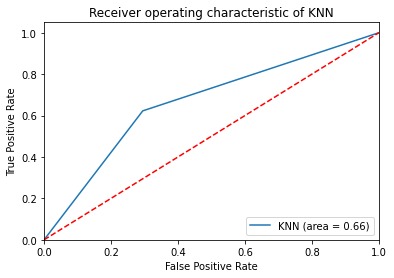

In [ ]:
auc = roc_auc_score(y2, knn_pred)
knn_list.insert(2,auc)
print("ROC AUC SCORE of KNN is", auc)
fpr, tpr, thresholds = roc_curve(y2, knn_pred)
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of KNN')
plt.legend(loc="lower right")
plt.savefig('knn_ROC')
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_list = ['Gaussian naive bayes'] # list of outputs 0-name, 1-lr_predict,2-AUC, 3-Accuracy score
nb_fit = GaussianNB()
nb_fit.fit(X1, y1)

GaussianNB()

In [ ]:
nb_pred=nb_fit.predict(X2)
nb_list.insert(1, nb_pred) # add to the same nb_list

In [ ]:
print ("Train Accuracy of Naive Bayes", nb_fit.score(X1, y1)*100)
print ("Accuracy score of  Naive Bayes", accuracy_score(y2, nb_pred)*100)

Train Accuracy of Naive Bayes 73.48837209302326
Accuracy score of  Naive Bayes 73.66863905325444


In [ ]:
nb_pred=nb_fit.predict(X2)
NB = round(nb_fit.score(X2, y2), 2)
mse = round(metrics.mean_squared_error(y2, nb_pred), 4)
print(mse)

0.2633


In [ ]:
print('Classification Report of Naive Bayes: \n',classification_report(y2,nb_pred,digits=4))

Classification Report of Naive Bayes: 
               precision    recall  f1-score   support

           0     0.9261    0.7474    0.8272       285
           1     0.3333    0.6792    0.4472        53

    accuracy                         0.7367       338
   macro avg     0.6297    0.7133    0.6372       338
weighted avg     0.8331    0.7367    0.7676       338



ROC AUC SCORE of Naive Bayes is 0.7133068520357496


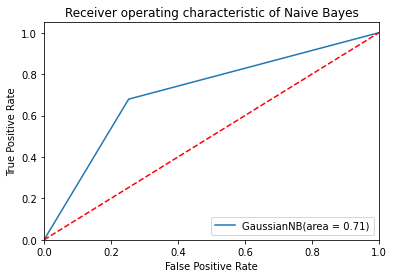

In [ ]:
auc = roc_auc_score(y2, nb_pred)
nb_list.insert(2,auc)
print("ROC AUC SCORE of Naive Bayes is", auc)
fpr, tpr, thresholds = roc_curve(y2, nb_pred)
plt.figure()
plt.plot(fpr, tpr, label='GaussianNB(area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Naive Bayes')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

Support Vector Machine

In [ ]:
from sklearn.svm import SVC
sv_list = ['Support vector classification'] # list of outputs 0-name, 1-lr_predict,2-AUC, 3-Accuracy score
sv_fit = SVC()
sv_fit.fit(X1, y1)

SVC()

In [ ]:
sv_pred=sv_fit.predict(X2)
sv_list.insert(1, sv_pred) # add to the same sv_list

In [ ]:
print ("Train Accuracy of SVM", sv_fit.score(X1, y1)*100)
print ("Accuracy score of  SVM", accuracy_score(y2, sv_pred)*100)

Train Accuracy of SVM 71.16279069767441
Accuracy score of  SVM 78.69822485207101


In [ ]:
sv_pred=sv_fit.predict(X2)
SVM = round(sv_fit.score(X2, y2), 2)
mse = round(metrics.mean_squared_error(y2, sv_pred), 4)
print(mse)

0.213


In [ ]:
print('Classification Report of SVM: \n',classification_report(y2,sv_pred,digits=4))

Classification Report of SVM: 
               precision    recall  f1-score   support

           0     0.9277    0.8105    0.8652       285
           1     0.3933    0.6604    0.4930        53

    accuracy                         0.7870       338
   macro avg     0.6605    0.7355    0.6791       338
weighted avg     0.8439    0.7870    0.8068       338



ROC AUC SCORE of SVM is 0.7354518371400198


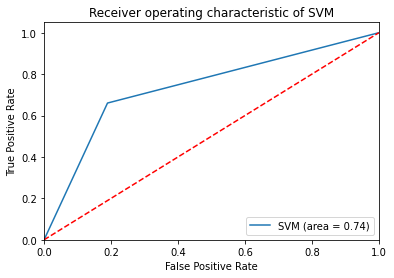

In [ ]:
auc = roc_auc_score(y2, sv_pred)
sv_list.insert(2,auc)
print("ROC AUC SCORE of SVM is", auc)
fpr, tpr, thresholds = roc_curve(y2, sv_pred)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of SVM')
plt.legend(loc="lower right")
plt.savefig('svm_ROC')
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_list = ['Decision tree classification'] # list of outputs 0-name, 1-lr_predict,2-AUC, 3-Accuracy score
dt_fit = DecisionTreeClassifier()
dt_fit.fit(X1, y1)

DecisionTreeClassifier()

In [ ]:
dt_pred=dt_fit.predict(X2)
dt_list.insert(1, dt_pred) # add to the same dt_list

In [ ]:
print ("Train Accuracy of Decision Tree", dt_fit.score(X1, y1)*100)
print ("Accuracy score of  Decision Tree", accuracy_score(y2, dt_pred)*100)

Train Accuracy of Decision Tree 100.0
Accuracy score of  Decision Tree 68.93491124260355


In [ ]:
dt_pred=dt_fit.predict(X2)
DT = round(dt_fit.score(X2, y2), 2)
mse = round(metrics.mean_squared_error(y2, dt_pred), 4)
print(mse)

0.3107


In [ ]:
print('Classification Report of Decision Tree: \n',classification_report(y2,dt_pred,digits=4))

Classification Report of Decision Tree: 
               precision    recall  f1-score   support

           0     0.9128    0.6982    0.7913       285
           1     0.2833    0.6415    0.3931        53

    accuracy                         0.6893       338
   macro avg     0.5981    0.6699    0.5922       338
weighted avg     0.8141    0.6893    0.7288       338



ROC AUC SCORE of Decision Tree is 0.6698775239986758


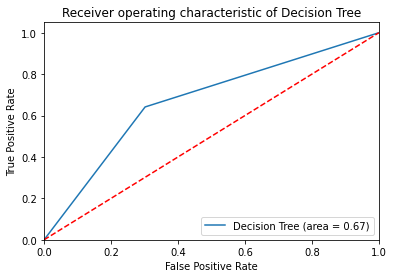

In [ ]:
auc = roc_auc_score(y2, dt_pred)
dt_list.insert(2,auc)
print("ROC AUC SCORE of Decision Tree is", auc)
fpr, tpr, thresholds = roc_curve(y2, dt_pred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Decision Tree')
plt.legend(loc="lower right")
plt.savefig('dt_ROC')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rt_list = ['Random forest classifier'] # list of outputs 0-name, 1-lr_predict,2-AUC, 3-Accuracy score
rt_fit = RandomForestClassifier(criterion = 'entropy')
rt_fit.fit(X1, y1)

RandomForestClassifier(criterion='entropy')

In [ ]:
rt_pred=rt_fit.predict(X2)
rt_list.insert(1, rt_pred) # add to the same knn_list

In [ ]:
print ("Train Accuracy of Random Forest", rt_fit.score(X1, y1)*100)
print ("Accuracy score of  Random Forest", accuracy_score(y2, rt_pred)*100)

Train Accuracy of Random Forest 100.0
Accuracy score of  Random Forest 76.62721893491124


In [ ]:
rt_pred=rt_fit.predict(X2)
RT = round(rt_fit.score(X2, y2), 2)
mse = round(metrics.mean_squared_error(y2, rt_pred), 4)
print(mse)

0.2337


In [ ]:
print('Classification Report of Random Forest: \n',classification_report(y2,rt_pred,digits=4))

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0     0.9478    0.7649    0.8466       285
           1     0.3796    0.7736    0.5093        53

    accuracy                         0.7663       338
   macro avg     0.6637    0.7692    0.6780       338
weighted avg     0.8587    0.7663    0.7937       338



ROC AUC SCORE of Random Forest is 0.7692485931810659


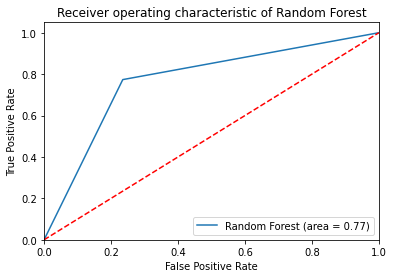

In [ ]:
auc = roc_auc_score(y2, rt_pred)
rt_list.insert(2,auc)
print("ROC AUC SCORE of Random Forest is", auc)
fpr, tpr, thresholds = roc_curve(y2, rt_pred)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Random Forest')
plt.legend(loc="lower right")
plt.savefig('rt_ROC')
plt.show()

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_list = ['Gradient boosting'] # list of outputs 0-name, 1-lr_predict,2-AUC, 3-Accuracy score
gb_fit = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,max_features=0.5,random_state=0)
gb_fit.fit(X1,y1)

GradientBoostingClassifier(learning_rate=0.05, max_features=0.5, random_state=0)

In [ ]:
gb_pred=gb_fit.predict(X2)
gb_list.insert(1, gb_pred) # add to the same gb_list

In [ ]:
print ("Train Accuracy of Gradient Boosting", gb_fit.score(X1, y1)*100)
print ("Accuracy score of Gradient Boosting", accuracy_score(y2, gb_pred)*100)

Train Accuracy of Gradient Boosting 88.60465116279069
Accuracy score of Gradient Boosting 73.37278106508876


In [ ]:
gb_pred=gb_fit.predict(X2)
gb = round(gb_fit.score(X2, y2), 2)
mse = round(metrics.mean_squared_error(y2, gb_pred), 4)
print(mse)

0.2663


In [ ]:
print('Classification Report of Gradient Boosting: \n',classification_report(y2,gb_pred,digits=4))

Classification Report of Gradient Boosting: 
               precision    recall  f1-score   support

           0     0.9412    0.7298    0.8221       285
           1     0.3419    0.7547    0.4706        53

    accuracy                         0.7337       338
   macro avg     0.6415    0.7423    0.6464       338
weighted avg     0.8472    0.7337    0.7670       338



ROC AUC SCORE of GB is 0.7422707712677922


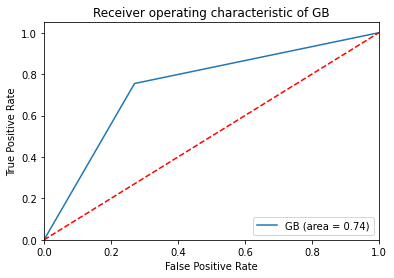

In [ ]:
auc = roc_auc_score(y2, gb_pred)
gb_list.insert(2,auc)
print("ROC AUC SCORE of GB is", auc)
fpr, tpr, thresholds = roc_curve(y2, gb_pred)
plt.figure()
plt.plot(fpr, tpr, label='GB (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of GB')
plt.legend(loc="lower right")
plt.savefig('gb_ROC')
plt.show()

Artificial Neural Network

In [ ]:
ANN = Sequential([
    Dense(12, activation='relu', input_shape=( 8 ,)),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
ANN.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = ANN.fit(X1, y1, 
               batch_size=57, epochs=100, validation_split=0.2 )
ANN_list = ['Artificial neural network'] # list of outputs 0-name, 1-lr_predict,2-AUC, 3-Accuracy score

Epoch 1/100


ValueError: ignored

In [ ]:
ANN_pred=ANN.predict(X2)
ANN_list.insert(1, ANN_pred) # add to the same knn_list
#print(lr_list[0])

In [ ]:
ANN_pred  = [1 if y>=0.5 else 0 for y in ANN_pred] 

In [ ]:
print ("Accuracy score of ANN", accuracy_score(y_test, ANN_pred))

In [ ]:
import numpy as np

input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x):
      return 1 / (1 + np.exp(-x))
def make_prediction(input_vector, weights, bias):
      layer_1 = np.dot(input_vector, weights) + bias
      layer_2 = sigmoid(layer_1)
      return layer_2

prediction = make_prediction(input_vector, weights_1, bias)


In [ ]:
target = 0

mse = np.square(prediction - target)

print(mse)

In [ ]:
print('Classification Report of Artificial Neural Network: \n',classification_report(y_test,ANN_pred,digits=4))

In [ ]:
x=np.arange(10).reshape(10,1)
idx=np.array([1],bool)
x[:,idx]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ANN_roc_auc = roc_auc_score(y_test, ANN.predict(X_test))
ANN_list.insert(2,auc)
fpr, tpr, thresholds = roc_curve(y_test, ANN.predict(X_test)[:,idx])
plt.figure()
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of ANN')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

In [ ]:
lr_as = accuracy_score(y_test, lr_pred, normalize= True)*100
lr_list.insert(3,lr_as)

nb_as = accuracy_score(y_test, nb_pred)*100
nb_list.insert(3,nb_as)

knn_as = accuracy_score(y_test, knn_pred)*100
knn_list.insert(3,knn_as)

dt_as = accuracy_score(y_test, dt_pred)*100
dt_list.insert(3,dt_as)

rt_as = accuracy_score(y_test, rt_pred)*100
rt_list.insert(3,rt_as)

gb_as = accuracy_score(y_test, gb_pred)*100
gb_list.insert(3,gb_as)

sv_as = accuracy_score(y_test, sv_pred)*100
sv_list.insert(3,sv_as)

ANN_as = accuracy_score(y_test, ANN_pred)*100
ANN_list.insert(3,lr_as)

print(sv_list[3])


NameError: ignored

In [ ]:
lr_mse = round(metrics.mean_squared_error(y_test, lr_pred), 4)
lr_list.insert(4,lr_mse)

nb_mse = round(metrics.mean_squared_error(y_test, nb_pred), 4)
nb_list.insert(4,nb_mse)

dt_mse = round(metrics.mean_squared_error(y_test, dt_pred), 4)
dt_list.insert(4,dt_mse)

rt_mse = round(metrics.mean_squared_error(y_test, rt_pred), 4)
rt_list.insert(4,rt_mse)

sv_mse = round(metrics.mean_squared_error(y_test, sv_pred), 4)
sv_list.insert(4,sv_mse)

gb_mse = round(metrics.mean_squared_error(y_test, gb_pred), 4)
gb_list.insert(4,gb_mse)

knn_mse = round(metrics.mean_squared_error(y_test, knn_pred), 4)
knn_list.insert(4,knn_mse)

nb_mse = round(metrics.mean_squared_error(y_test, nb_pred), 4)
nb_list.insert(4,nb_mse)

ANN_mse = np.square(prediction - target)
ANN_list.insert(4,ANN_mse)



In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df['BloodPressure'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

from scipy.stats import shapiro
stat, p = shapiro(df['Pregnancies'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

from scipy.stats import shapiro
stat, p = shapiro(df['Glucose'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

from scipy.stats import shapiro
stat, p = shapiro(df['Insulin'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

from scipy.stats import shapiro
stat, p = shapiro(df['Age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

from scipy.stats import shapiro
stat, p = shapiro(df['DiabetesPedigreeFunction'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

from scipy.stats import shapiro
stat, p = shapiro(df['BMI'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

In [ ]:
from tabulate import tabulate
print(tabulate([[lr_list[0],lr_list[2], lr_list[3], lr_list[4]], [nb_list[0], nb_list[2], nb_list[3], nb_list[4]], [dt_list[0],dt_list[2], dt_list[3], dt_list[4]], [sv_list[0],sv_list[2], sv_list[3], sv_list[4]], [rt_list[0],rt_list[2], rt_list[3], rt_list[4]], [gb_list[0],gb_list[2], gb_list[3], gb_list[4]], [ANN_list[0],ANN_list[2], ANN_list[3], ANN_list[4]], [knn_list[0],knn_list[2], knn_list[3], knn_list[4]]], headers=['Name', 'Area under curver', 'Accuracy score','Mean squared error']))

In [ ]:
list1=['Logistic Regression', 'Naive Bayes', 'Support Vector Machine', 'K-Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Arificial Neural Network']
list2=[lr_list[3], nb_list[3], sv_list[3], knn_list[3], dt_list[3], rt_list[3], ANN_list[3] ]

In [ ]:
res = {}
for key in list1:
    for value in list2:
        res[key] = value
        list2.remove(value)
        break  

In [ ]:
print ("Resultant dictionary is : " +  str(res))

In [ ]:
max_key = max(res, key=res.get)

In [ ]:
print("The model with maximum accuracy is",(max_key))


In [ ]:
test.head()

In [ ]:
train=pd.read_csv('traine.csv')
test=pd.read_csv('test.csv')

In [ ]:
print(test.head())



In [ ]:
y_predictlr = lr_fit.predict(X2)
print("Y predictlr/hat ", y_predictlr)

In [ ]:
y_predictnb = nb_fit.predict(X2)
print("Y predictnb/hat ", y_predictnb)

In [ ]:
y_predictrt = rt_fit.predict(X2)
print("Y predictrt/hat ", y_predictrt)

In [ ]:
y_predictknn = knn_fit.predict(X2)
print("Y predictknn/hat ", y_predictknn)

In [ ]:
y_predictsv = sv_fit.predict(X2)
print("Y predictsv/hat ", y_predictsv)

In [ ]:
y_predictgb = gb_fit.predict(X2)
print("Y predictgb/hat ", y_predictgb)

In [ ]:
y_predictdt = dt_fit.predict(X2)
print("Y predictdt/hat ", y_predictdt)

In [ ]:
df2=pd.DataFrame(y_predictlr, columns=['Logistic Regression']) 
df3=pd.DataFrame(y_predictnb, columns=['Naive Bayes'])
df4=pd.DataFrame(y_predictdt, columns=['Decision Tree'])
df5=pd.DataFrame(y_predictrt, columns=['Random Forest'])
df6=pd.DataFrame(y_predictknn, columns=['KNN'])
df7=pd.DataFrame(y_predictsv, columns=['SVM'])
df8=pd.DataFrame(y_predictgb, columns=['Gradeint Boosting'])

df10=pd.merge(df2,df3,left_index=True,right_index=True,how='left')
df10


In [ ]:
df11=pd.merge(df10,df4,left_index=True,right_index=True,how='left')
df12=pd.merge(df11,df5,left_index=True,right_index=True,how='left')
df13=pd.merge(df12,df6,left_index=True,right_index=True,how='left')
df14=pd.merge(df13,df7,left_index=True,right_index=True,how='left')
df15=pd.merge(df14,df8,left_index=True,right_index=True,how='left')
df15


In [ ]:

dffinal=pd.merge(test,df15,left_index=True,right_index=True,how='left')
dffinal

In [ ]:
from google.colab import files
dffinal.to_csv('Prediction.csv') 
files.download('Prediction.csv')

In [ ]:
print(test.head())


In [ ]:
df10 = pd.merge(test,df2,df3,df4,df5,df6,df7,df8)
df10